
# Breast cancer dataset - OPTIONAL


## Read data¶

### Question 1
Read the data given in bc2.csv file

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("C://Users//kjbl051//Desktop//COurse//Residency 2//Lab ML//bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [8]:
# No. of Records in dataset
df.shape
# the dataset has got 11 columns and 699 rows.

(699, 11)

In [10]:
#finding the data type of each columns
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

#Hint: use **describe()**

In [11]:
#Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


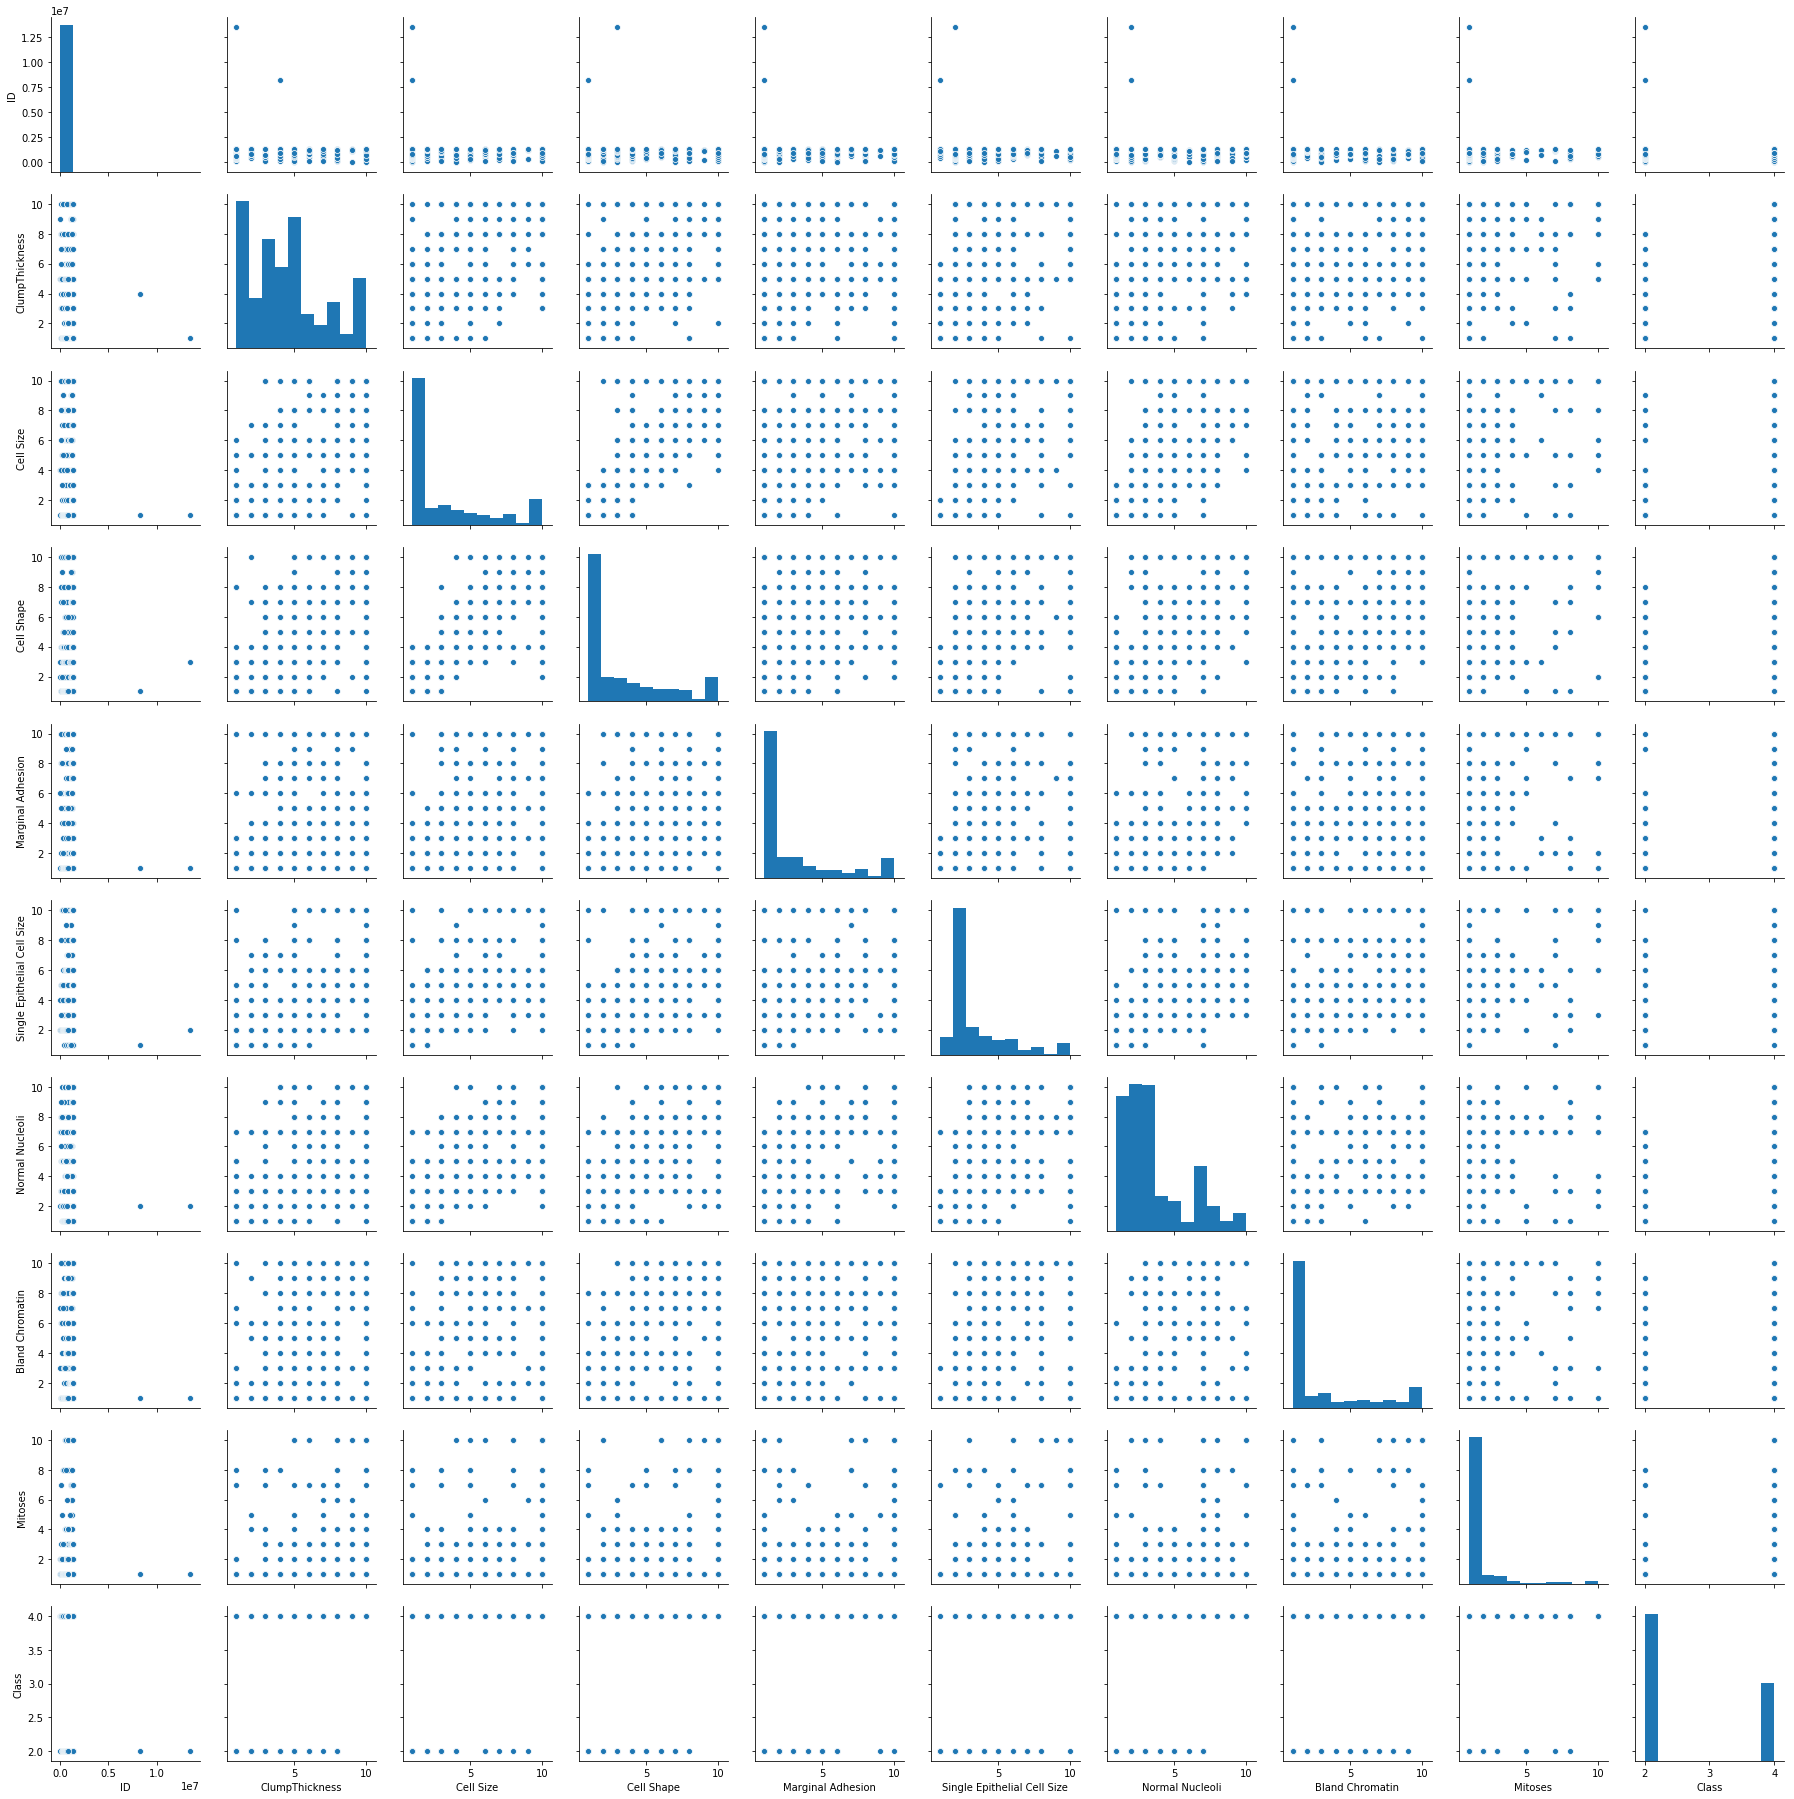

In [13]:
#Checking for any outlayers by plotting pairplot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df)

# By lookign at the Pairplot, the Outlayer is only observed in "ID" Column, hence it can be ignored untreated 

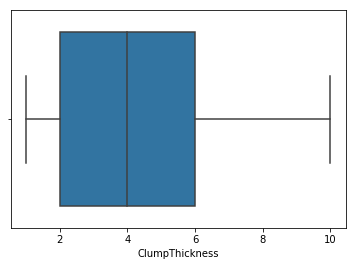

In [16]:
#instead outlayers for each of the column shall be identified by BoxPlot
#for ClumpThickness column
sns.boxplot(df.ClumpThickness)
#sns.boxplot(df.Class)


#### Check Missing Values

In [17]:
#Checking if there is any missing values
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [23]:
#Checking the count of "?" in "Bare Nuclei" column.
df['Bare Nuclei'][df['Bare Nuclei']=='?'].count()

# It has got 16 times "?" in Bare Nuclei column

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [19]:
df.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [21]:
#finding the top value for Bare Nuclei column
bare_nuclei_top = df['Bare Nuclei'].iloc[0]


In [25]:
#replacing "?" by the top value
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?',bare_nuclei_top)
#df['Bare Nuclei'].replace({'?': df.describe(include='all')['Bare Nuclei']['top']}, inplace=True)

In [28]:
#confirming that there is no "?" symbol
df['Bare Nuclei'][df['Bare Nuclei']=='?'].count()

0

### Question 5
#### Find the distribution of target variable (Class) 

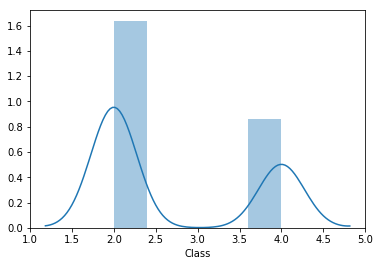

In [29]:
#finding the distribution of variable 'Class'
sns.distplot(df['Class'])

#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

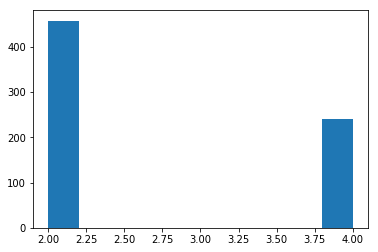

In [30]:
#Importing the pyplot from matplotlib library
import matplotlib.pyplot as plt
plt.hist(x="Class", data=df)

#### Convert the datatype of Bare Nuclei to `int`

In [31]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [32]:
#Changing the datatype from 'Object' to 'int'
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [34]:
#Verifying if the datatype is changed
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [39]:
#before we plot scatter_matrix, drop ID column as it is not making any sense for the model prediction
df =  df.drop(['ID'], axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239062D0780>,
      dtype=object)

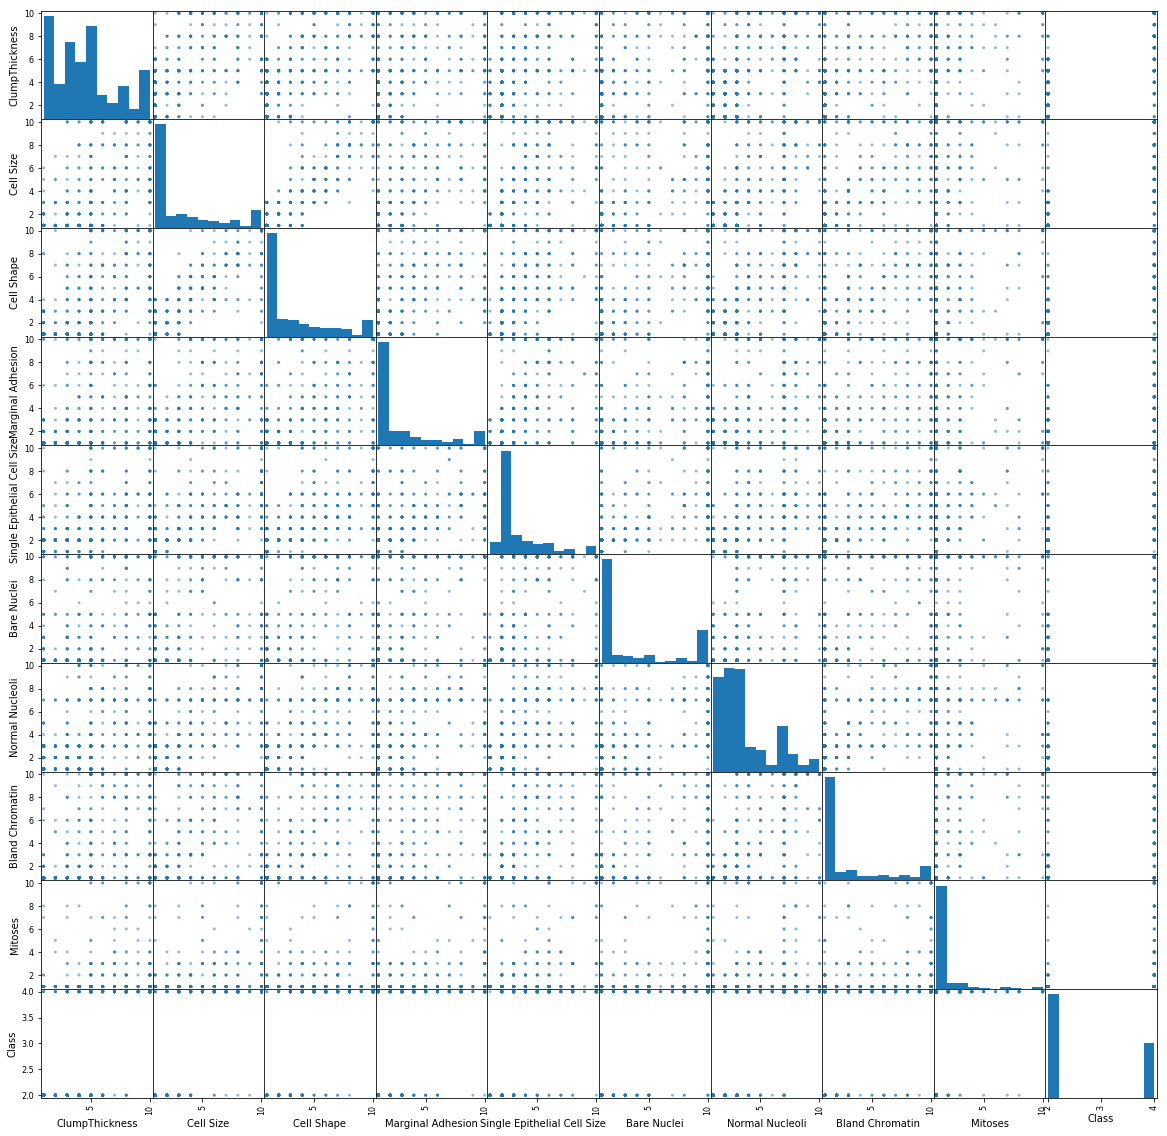

In [40]:
#plotting the scatter_matrix of variables
pd.plotting.scatter_matrix(df, alpha = 0.5, figsize =(20,20))

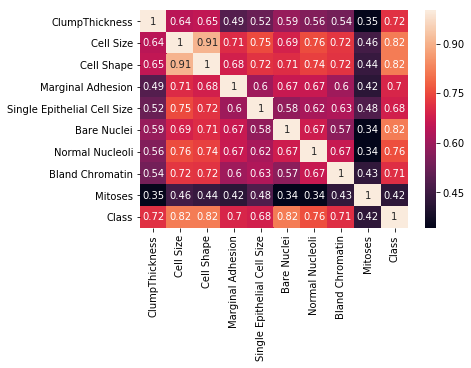

In [41]:
#Check the correlation among the variables. 
sns.heatmap(df.corr(), annot=True)

In [37]:
#From the scatter_matrix distribution & heat map, it is evident that "Cell Size" & "Cell Shape" are nearly colinear (91%).
#But not 100% colinear, hence NOT dropping off any variables

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [43]:
from sklearn.model_selection import train_test_split


In [42]:
#X being the dataset excluding the target variable 
X = df.drop(['Class'], axis=1)
#Y being the dataset of target variable "Class"
Y = df['Class']

#### Divide the Training and Test sets in 70:30 

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [45]:
# Checking the size of Train and Test datasets
print(X_train.shape)
print(Y_train.shape)

(489, 9)
(489,)


In [46]:
print(X_test.shape)
print(Y_test.shape)

(210, 9)
(210,)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [1]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
#print(scaler.fit(df))
#print(scaler.transform(df))
#Standardize features by removing the mean and scaling to unit variance
df_new = scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [56]:
df_new

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.14846494,  1.59563215,  0.94032386, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.14846494,  1.59563215,  1.61377302, ...,  0.37131451,
        -0.34391178,  1.37855538]])

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [57]:
# Loading Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
#Building the model

ac_scores = []

for K in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
    print("Accuracy value when K is " + str(K) +": " + str(score*100))
    ac_scores.append((score,K))

Accuracy value when K is 3: 96.66666666666667
Accuracy value when K is 5: 97.14285714285714
Accuracy value when K is 9: 95.71428571428572


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [80]:
#finding the Accuracy value for all given K values and append the scores in to an array
K_values = []
scores = []
for K in range (1,20,1):
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, y_pred)
    print("Accuracy value when K is " + str(K) +": " + str(score*100))
    K_values.append(K)
    scores.append(score)
    #ac_scores.append((score,K))

Accuracy value when K is 1: 97.61904761904762
Accuracy value when K is 2: 95.23809523809523
Accuracy value when K is 3: 96.66666666666667
Accuracy value when K is 4: 97.14285714285714
Accuracy value when K is 5: 97.14285714285714
Accuracy value when K is 6: 96.66666666666667
Accuracy value when K is 7: 95.71428571428572
Accuracy value when K is 8: 96.19047619047619
Accuracy value when K is 9: 95.71428571428572
Accuracy value when K is 10: 96.19047619047619
Accuracy value when K is 11: 95.71428571428572
Accuracy value when K is 12: 95.71428571428572
Accuracy value when K is 13: 95.23809523809523
Accuracy value when K is 14: 95.23809523809523
Accuracy value when K is 15: 95.23809523809523
Accuracy value when K is 16: 95.23809523809523
Accuracy value when K is 17: 95.23809523809523
Accuracy value when K is 18: 95.23809523809523
Accuracy value when K is 19: 95.23809523809523


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline 

Text(1, 0.976, '  maximum Accuracy')

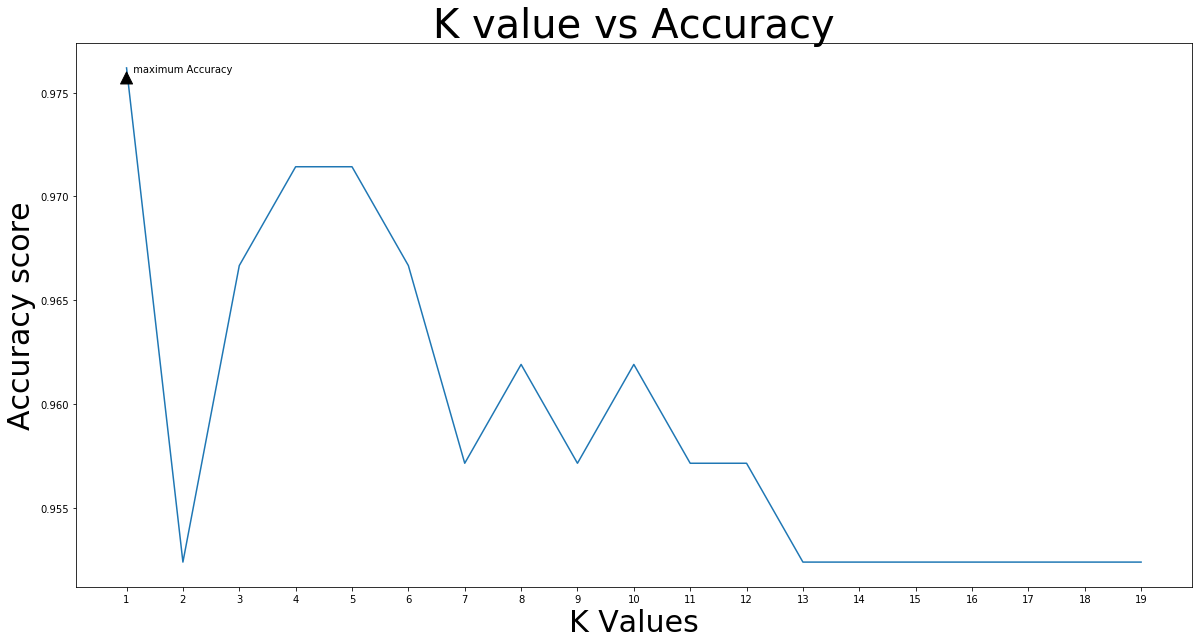

In [117]:
#PLotting K Value VS Accuracy

plt.figure(figsize=(20,10))
plt.plot(K_values,scores)
plt.xlabel("K Values", fontsize=30)
plt.ylabel("Accuracy score", fontsize=30)
plt.title('K value vs Accuracy', fontsize=40)
plt.xticks(K_values)
plt.annotate('  maximum Accuracy', xy=(1, 0.976), arrowprops=dict(facecolor='black', shrink=0.05))